In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from scipy.signal import savgol_filter
from icecream import ic
import random

In [2]:
data = pd.read_csv("/home/sonn/Son/Workspace/UV-Vis_IR_NuocCam/data/data_tunhien.csv")
data.head()

,TenMau,DiaPhuong,NamLayMau,Giong,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,...,245,240,235,230,225,220,215,210,205,200
0,BG.23.Vinh.01,Bắc Giang,2023,Vinh,0.288038,0.314208,0.312564,0.283867,0.275794,0.293704,...,2.369,2.630,2.855,2.885,2.676,2.370,2.081,1.853,1.699,1.620
1,BG.23.Vinh.02,Bắc Giang,2023,Vinh,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,...,2.578,2.808,3.041,3.136,3.004,2.738,2.461,2.236,2.085,2.012
2,BG.23.Vinh.04,Bắc Giang,2023,Vinh,0.283841,0.278747,0.278234,0.276258,0.274365,0.272161,...,5.167,20.000,20.000,5.079,3.885,3.273,2.884,2.630,2.475,2.401
3,BG.23.Vinh.05,Bắc Giang,2023,Vinh,0.193778,0.195921,0.196467,0.195541,0.198358,0.194969,...,3.279,3.597,3.823,3.735,3.400,3.032,2.725,2.496,2.345,2.271
4,BG.23.Vinh.07,Bắc Giang,2023,Vinh,0.225972,0.224173,0.225184,0.221635,0.219974,0.218776,...,3.111,3.447,3.759,3.750,3.401,2.991,2.649,2.400,2.240,2.164


In [3]:
X = data.iloc[:,4:]
X.head()

,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,678.3755,682.1028,...,245,240,235,230,225,220,215,210,205,200
0,0.288038,0.314208,0.312564,0.283867,0.275794,0.293704,0.297450,0.278578,0.271924,0.281354,...,2.369,2.630,2.855,2.885,2.676,2.370,2.081,1.853,1.699,1.620
1,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,0.312266,0.307793,...,2.578,2.808,3.041,3.136,3.004,2.738,2.461,2.236,2.085,2.012
2,0.283841,0.278747,0.278234,0.276258,0.274365,0.272161,0.269835,0.266996,0.265478,0.261862,...,5.167,20.000,20.000,5.079,3.885,3.273,2.884,2.630,2.475,2.401
3,0.193778,0.195921,0.196467,0.195541,0.198358,0.194969,0.194062,0.193205,0.193799,0.194423,...,3.279,3.597,3.823,3.735,3.400,3.032,2.725,2.496,2.345,2.271
4,0.225972,0.224173,0.225184,0.221635,0.219974,0.218776,0.218363,0.217704,0.216161,0.214019,...,3.111,3.447,3.759,3.750,3.401,2.991,2.649,2.400,2.240,2.164


In [4]:
y = data['Giong']

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 1061), (30, 1061), (117,), (30,))

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PCA

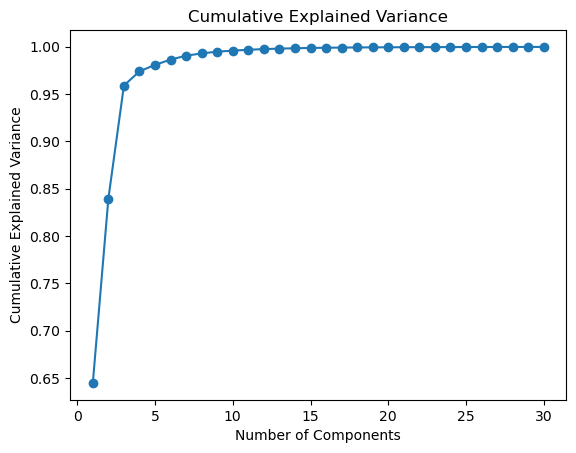

In [8]:
pca = PCA(30)
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

PCA-SVC

In [9]:
pca = PCA()
svc = SVC()
pipeline = Pipeline(steps=[('pca', pca), ('svc', svc)])
param_grid = {
    'pca__n_components': [2, 3, 4,5,6,7,8,9],
    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
}  
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print("\n\n")
ic(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
print("Accuracy score:",accuracy_score(y_test, model.predict(X_test)))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END pca__n_components=2, svc__kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END pca__n_components=2, svc__kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END pca__n_components=2, svc__kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END pca__n_components=2, svc__kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END pca__n_components=2, svc__kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END pca__n_components=2, svc__kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5] END pca__n_components=2, svc__kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5] END pca__n_components=2, svc__kernel=poly;, score=0.652 total time=   0.0s
[CV 4/5] END pca__n_components=2, svc__kernel=poly;, score=0.609 total time=   0.0s
[CV 5/5] END pca__n_components=2, svc__kernel=poly;, score=0.652 total time=   0.0s
[CV 1/5] END pca__n_components=2, svc__kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 2/5] END pca

/home/sonn/.conda/envs/WSAIPYthon311/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END pca__n_components=3, svc__kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END pca__n_components=3, svc__kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END pca__n_components=3, svc__kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END pca__n_components=3, svc__kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END pca__n_components=3, svc__kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5] END pca__n_components=3, svc__kernel=poly;, score=0.625 total time=   0.0s
[CV 3/5] END pca__n_components=3, svc__kernel=poly;, score=0.652 total time=   0.0s
[CV 4/5] END pca__n_components=3, svc__kernel=poly;, score=0.565 total time=   0.0s
[CV 5/5] END pca__n_components=3, svc__kernel=poly;, score=0.652 total time=   0.0s
[CV 1/5] END pca__n_components=3, svc__kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 2/5] END pca__n_components=3, svc__kernel=sigmoid;, score=0.708 total time=   0.0s
[CV 3/5] END pca__n_components=3, svc__kernel=sigmoid;, score=0.652 total 

ic| grid.best_params_: {'pca__n_components': 7, 'svc__kernel': 'linear'}


Accuracy score: 0.6666666666666666


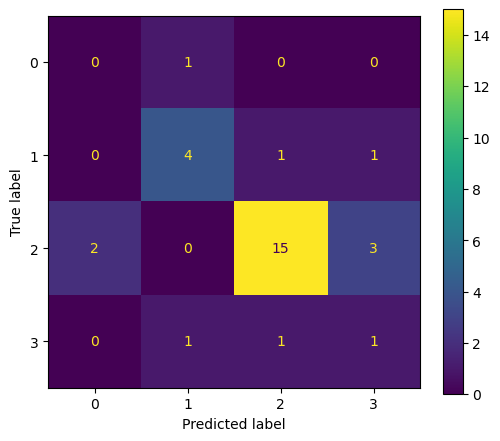

In [10]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)))
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

PCA-DA

In [11]:
pca = PCA()
dt = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('pca', pca), ('dt', dt)])
param_grid = {
    'pca__n_components': [2,3,4,5,6,7,8,9,10,12,14],
}
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print("\n\n")
ic(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
print("Accuracy score:",accuracy_score(y_test, model.predict(X_test)))

/home/sonn/.conda/envs/WSAIPYthon311/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............pca__n_components=2;, score=0.542 total time=   0.0s
[CV 2/5] END ...............pca__n_components=2;, score=0.458 total time=   0.0s
[CV 3/5] END ...............pca__n_components=2;, score=0.565 total time=   0.0s
[CV 4/5] END ...............pca__n_components=2;, score=0.478 total time=   0.0s
[CV 5/5] END ...............pca__n_components=2;, score=0.652 total time=   0.0s
[CV 1/5] END ...............pca__n_components=3;, score=0.625 total time=   0.0s
[CV 2/5] END ...............pca__n_components=3;, score=0.458 total time=   0.0s
[CV 3/5] END ...............pca__n_components=3;, score=0.609 total time=   0.0s
[CV 4/5] END ...............pca__n_components=3;, score=0.565 total time=   0.0s
[CV 5/5] END ...............pca__n_components=3;, score=0.565 total time=   0.0s
[CV 1/5] END ...............pca__n_components=4;, score=0.708 total time=   0.0s
[CV 2/5] END ...............pca__n_components=4;

ic| grid.best_params_: {'pca__n_components': 6}





Accuracy score: 0.6333333333333333


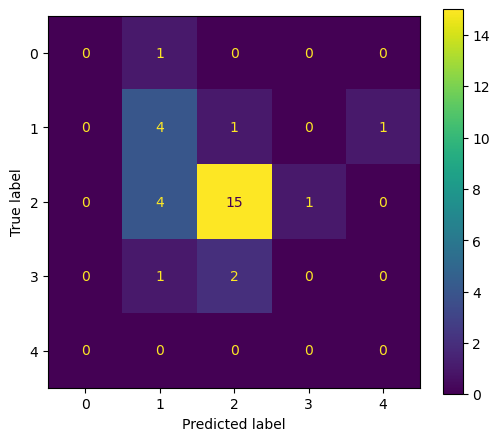

In [12]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)))
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

PCA-RF

In [13]:
pca = PCA()
rf = RandomForestClassifier()
pipeline = Pipeline(steps=[('pca', pca), ('rf', rf)])
param_grid = {
    'pca__n_components': [2,3,4,5,6,7,8,9,10,12,14, 16, 18],
}
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print("\n\n")
ic(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
print("Accuracy score:",accuracy_score(y_test, model.predict(X_test)))

Fitting 5 folds for each of 13 candidates, totalling 65 fits


/home/sonn/.conda/envs/WSAIPYthon311/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ...............pca__n_components=2;, score=0.667 total time=   0.1s
[CV 2/5] END ...............pca__n_components=2;, score=0.542 total time=   0.1s
[CV 3/5] END ...............pca__n_components=2;, score=0.696 total time=   0.1s
[CV 4/5] END ...............pca__n_components=2;, score=0.609 total time=   0.1s
[CV 5/5] END ...............pca__n_components=2;, score=0.739 total time=   0.1s
[CV 1/5] END ...............pca__n_components=3;, score=0.750 total time=   0.1s
[CV 2/5] END ...............pca__n_components=3;, score=0.542 total time=   0.1s
[CV 3/5] END ...............pca__n_components=3;, score=0.652 total time=   0.1s
[CV 4/5] END ...............pca__n_components=3;, score=0.652 total time=   0.1s
[CV 5/5] END ...............pca__n_components=3;, score=0.739 total time=   0.1s
[CV 1/5] END ...............pca__n_components=4;, score=0.792 total time=   0.1s
[CV 2/5] END ...............pca__n_components=4;, score=0.708 total time=   0.1s
[CV 3/5] END ...............

ic| grid.best_params_: {'pca__n_components': 10}


[CV 5/5] END ..............pca__n_components=18;, score=0.870 total time=   0.3s



Accuracy score: 0.6333333333333333


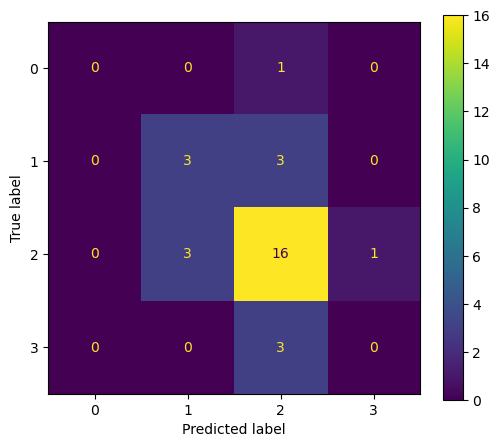

In [14]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)))
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

PCA-ANN

In [15]:
pca = PCA()
mlp = MLPClassifier()
pipeline = Pipeline(steps=[('pca', pca), ('mlp', mlp)])
param_grid = {
    'pca__n_components': [2,3,4,5,6,7,8,9,10,12,14, 16, 18],
    'mlp__solver': ['adam', 'sgd'], 
    'mlp__hidden_layer_sizes': [(2,2), (4,4), (5,5), (10, 10), (20, 20)], 
    'mlp__batch_size': [8, 12, 24, 64],
    'mlp__early_stopping': [True],
}
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print("\n\n")
ic(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
print("Accuracy score:",accuracy_score(y_test, model.predict(X_test)))


Fitting 5 folds for each of 520 candidates, totalling 2600 fits
[CV 1/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(2, 2), mlp__solver=adam, pca__n_components=2;, score=0.042 total time=   0.1s
[CV 2/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(2, 2), mlp__solver=adam, pca__n_components=2;, score=0.667 total time=   0.1s


/home/sonn/.conda/envs/WSAIPYthon311/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(2, 2), mlp__solver=adam, pca__n_components=2;, score=0.130 total time=   0.0s
[CV 4/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(2, 2), mlp__solver=adam, pca__n_components=2;, score=0.435 total time=   0.1s
[CV 5/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(2, 2), mlp__solver=adam, pca__n_components=2;, score=0.043 total time=   0.1s
[CV 1/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(2, 2), mlp__solver=adam, pca__n_components=3;, score=0.167 total time=   0.0s
[CV 2/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(2, 2), mlp__solver=adam, pca__n_components=3;, score=0.042 total time=   0.0s
[CV 3/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(2, 2), mlp__solver=adam, pca__n_components=3;, score=0.000 total time=   0.0s
[CV 4/5] END mlp__batch_size=8, ml

ic| grid.best_params_: {'mlp__batch_size': 12,
                        'mlp__early_stopping': True,
                        'mlp__hidden_layer_sizes':

[CV 5/5] END mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(20, 20), mlp__solver=sgd, pca__n_components=18;, score=0.522 total time=   0.2s





 (20, 20),
                        'mlp__solver': 'adam',
                        'pca__n_components': 14}


Accuracy score: 0.6666666666666666


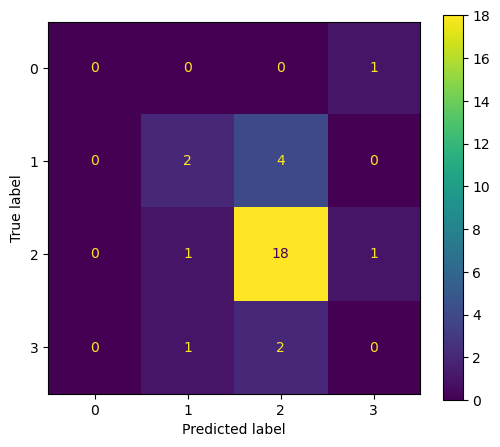

In [16]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)))
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()